# Business problem.

The data set is based on the data of the customer who are applying for a laon in a firm. Based upon the several features we will closely study the data and check how much close we can get to predict the class of the customer i.e. whether he/she will be applying for the loan or not.
As this is a classic classification problem therefore, I have decided to go forward with the 'Logistic Regression' and later on also use the 'Decision Tree' in order to correctly classify the customer on the given feautres of the customers. 


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%pylab inline
from sklearn import *
from scipy import interp
sb.set(rc={'figure.figsize':(10,8)})
sb.set_style(style= 'darkgrid')


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('Loan.csv')
data.head(20)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan(D),SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [3]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan(D)', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
imp_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'SecuritiesAccount','PersonalLoan(D)',
       'CDAccount', 'Online', 'CreditCard']


C:\PYTHON\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\PYTHON\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


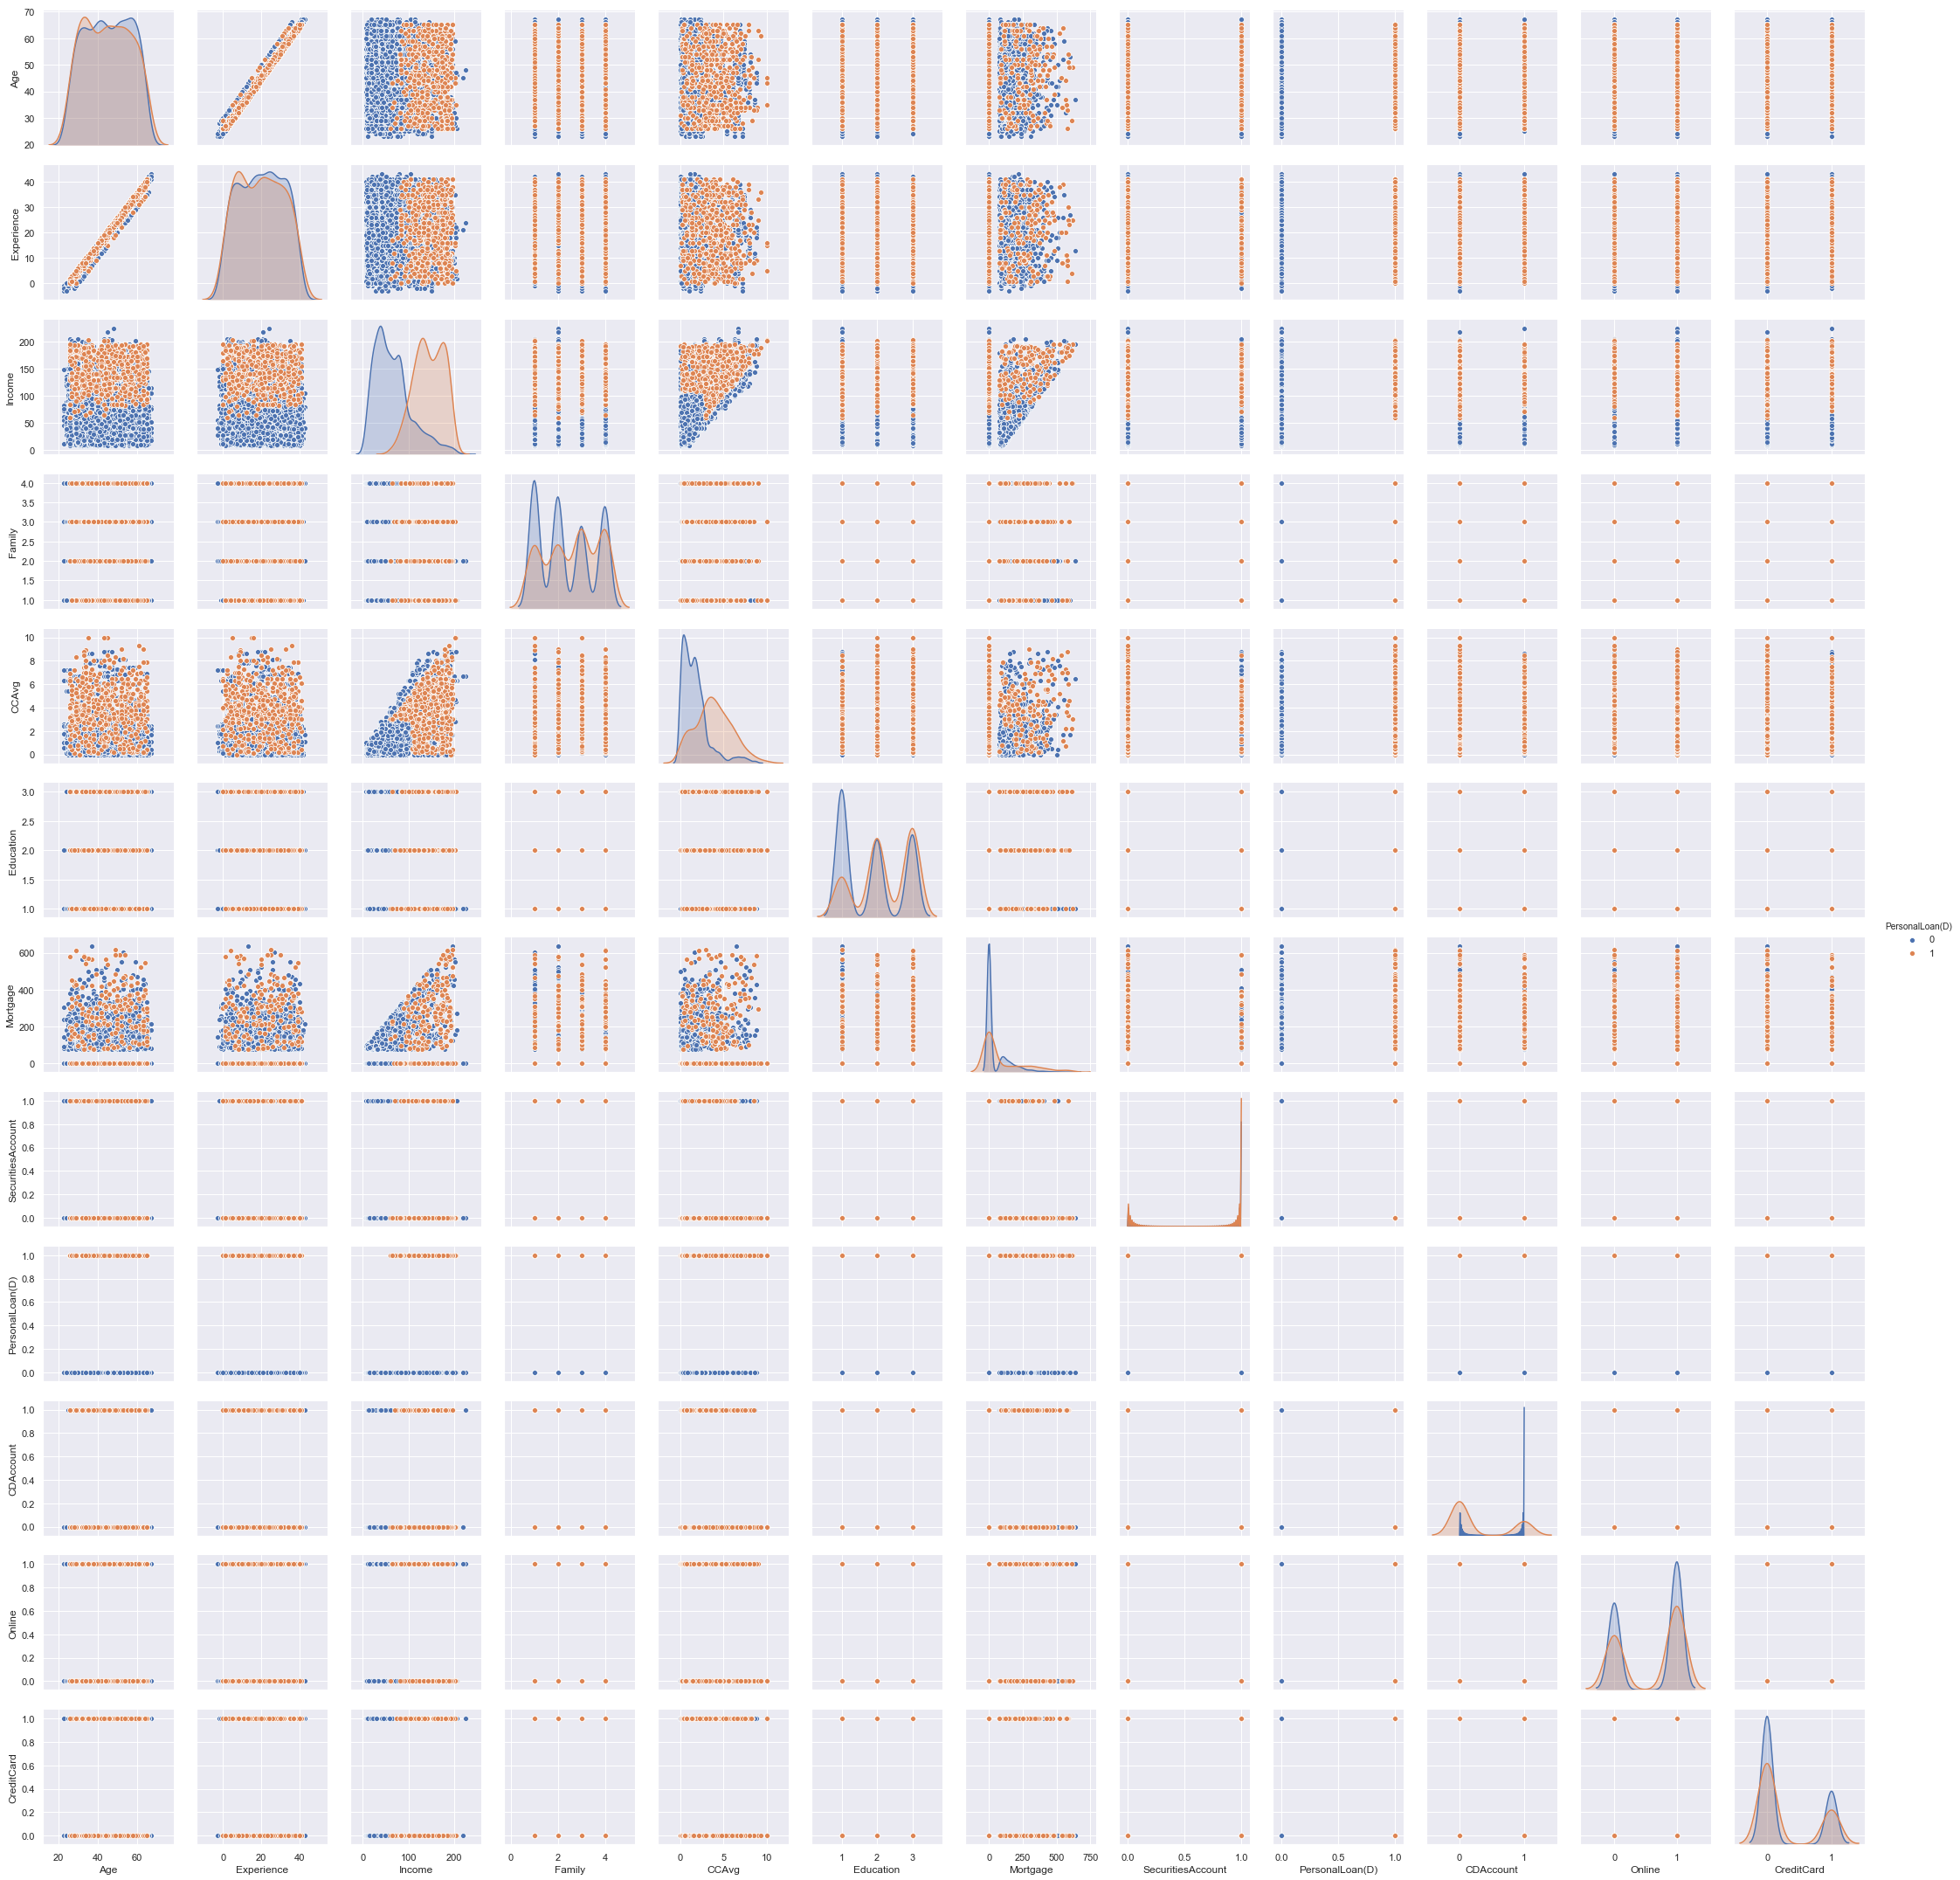

In [5]:
sb.pairplot(data[imp_features], hue = 'PersonalLoan(D)')

In [7]:
 numeric_features = data.select_dtypes(include = int64)

In [8]:
numeric_features.head()

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,PersonalLoan(D),SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,91107,4,1,0,0,1,0,0,0
1,45,19,34,90089,3,1,0,0,1,0,0,0
2,39,15,11,94720,1,1,0,0,0,0,0,0
3,35,9,100,94112,1,2,0,0,0,0,0,0
4,35,8,45,91330,4,2,0,0,0,0,0,1


Text(0.5, 1.0, 'Heatmap for Numeric features')

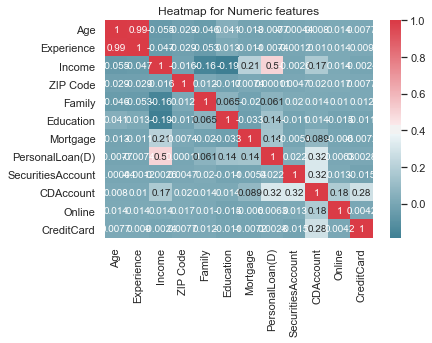

In [9]:
correl = numeric_features.corr()
cmap = sb.diverging_palette(220, 10, as_cmap=True)
sb.heatmap(correl, cmap = cmap, annot = True)
plt.title("Heatmap for Numeric features")


correlations above 0.4 to be relatively strong; correlations between 0.2 and 0.4 are moderate, and those below 0.2 are considered weak. Therefore from the above heatmap I will drop all the variables that has r < 0.1. 

In [10]:
 q = correl['PersonalLoan(D)']
# reviewing the correlation of the feautres with the target variables. 


In [11]:
for i in q: 
    print(q*100)

Age                   -0.772562
Experience            -0.741310
Income                50.246229
ZIP Code               0.010738
Family                 6.136704
Education             13.672155
Mortgage              14.209524
PersonalLoan(D)      100.000000
SecuritiesAccount      2.195388
CDAccount             31.635483
Online                 0.627782
CreditCard             0.280151
Name: PersonalLoan(D), dtype: float64
Age                   -0.772562
Experience            -0.741310
Income                50.246229
ZIP Code               0.010738
Family                 6.136704
Education             13.672155
Mortgage              14.209524
PersonalLoan(D)      100.000000
SecuritiesAccount      2.195388
CDAccount             31.635483
Online                 0.627782
CreditCard             0.280151
Name: PersonalLoan(D), dtype: float64
Age                   -0.772562
Experience            -0.741310
Income                50.246229
ZIP Code               0.010738
Family                 6.136

In [ ]:
#these are the correlation of the features with the Target variable:  
    #Income 50.246229,Family 6.136704,Education 13.672155,
# Mortgage 14.209524,PersonalLoan(D) 100.000000,SecuritiesAccount 2.195388,CDAccount 31.635483

On the basis of the above correlation b/w variable will be dropping SecuritiesAccount 2.195388,Family 6.136704, Online 0.006278,CreditCard 0.002802


 I will drop  some irrelevant variables in the dataset to make the data more cleaner. 


In [12]:
 
data1=data.drop(['ZIP Code','Family','Online','SecuritiesAccount','CreditCard'],1)
data1.head()

,Age,Experience,Income,CCAvg,Education,Mortgage,PersonalLoan(D),CDAccount
0,25,1,49,1.6,1,0,0,0
1,45,19,34,1.5,1,0,0,0
2,39,15,11,1.0,1,0,0,0
3,35,9,100,2.7,2,0,0,0
4,35,8,45,1.0,2,0,0,0


Now the data has been cleaned or wrangled, now will conduct an EDA to check the relation of the variables with the 'Target Variable'. 


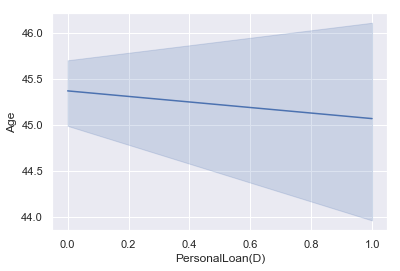

In [13]:
sb.lineplot(data1['PersonalLoan(D)'], data1.Age)
# As we can see there is fairly low level correlation between the target varaible and the independent varaible (Age)


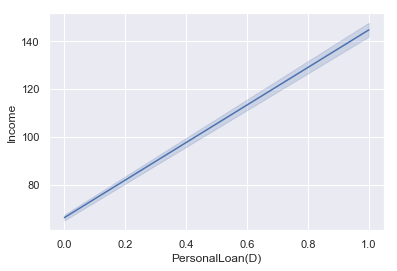

In [14]:
sb.lineplot(data1['PersonalLoan(D)'], data1.Income)

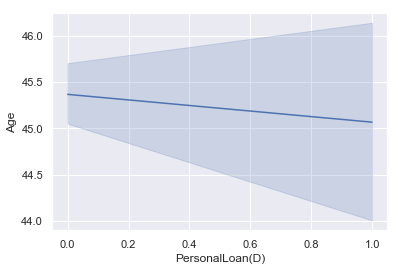

In [15]:
sb.lineplot(data1['PersonalLoan(D)'], data1.Age)

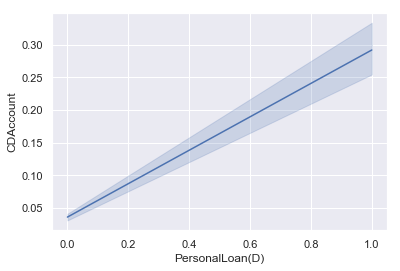

In [16]:
sb.lineplot(data1['PersonalLoan(D)'], data1.CDAccount)

In [17]:
data1.head()

,Age,Experience,Income,CCAvg,Education,Mortgage,PersonalLoan(D),CDAccount
0,25,1,49,1.6,1,0,0,0
1,45,19,34,1.5,1,0,0,0
2,39,15,11,1.0,1,0,0,0
3,35,9,100,2.7,2,0,0,0
4,35,8,45,1.0,2,0,0,0


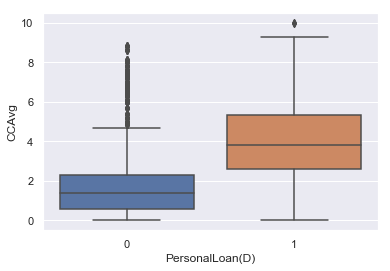

In [18]:
sb.boxplot(data1['PersonalLoan(D)'], data1.CCAvg) 

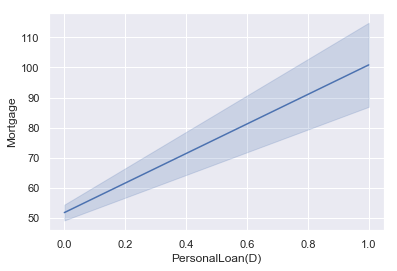

In [19]:
sb.lineplot(data1['PersonalLoan(D)'], data1.Mortgage)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIP Code             5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan(D)      5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [21]:
data.isnull().sum()

Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan(D)      0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

As we can see now there is no null value in the data. It is all good to go!

In [22]:
X = data1.drop(['PersonalLoan(D)'],1)
Y = data1['PersonalLoan(D)']

In [23]:
# Applying the Logisitic Regression algorithm to model. 
lg = linear_model.LogisticRegression()
model = lg.fit(X,Y)

C:\PYTHON\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
model.score(X,Y) # This is the overall score of the model which will tell the accuracy of the model. 

0.9466

In [25]:
Y_pred = model.predict(X)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
probability = lg.predict_proba(X)[:,0]>.3,1,0 

In [123]:
metrics.confusion_matrix(Y,Y_pred)

array([[4456,   64],
       [ 203,  277]], dtype=int64)

This is the confusion matrix for the data which is predicted(top) and actual(left).

In [26]:
metrics.confusion_matrix(Y,Y_pred)

array([[4456,   64],
       [ 203,  277]], dtype=int64)

In [110]:
acc = accuracy_score(Y, Y_pred)
pre = precision_score(Y, Y_pred)
rec = recall_score(Y, Y_pred)

In [111]:
print(acc, pre, rec)

0.9466 0.8123167155425219 0.5770833333333333


In [27]:
# Recall/TPR
recall = 192/(113+192)
recall

0.6295081967213115

In [28]:
accuracy = (4407+192)/(4407+288+113+192)
accuracy

0.9198

In [40]:
data1['prediction'] = Y_pred

In [30]:
data1.head()

,Age,Experience,Income,CCAvg,Education,Mortgage,PersonalLoan(D),CDAccount,prediction
0,25,1,49,1.6,1,0,0,0,0
1,45,19,34,1.5,1,0,0,0,0
2,39,15,11,1.0,1,0,0,0,0
3,35,9,100,2.7,2,0,0,0,0
4,35,8,45,1.0,2,0,0,0,0


# Now we will train and test the data. 
Above this I have checked the performance on the training set of the data without splitting and checking how well the data is trained.  

In [31]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size=.3, 
                                                                    random_state = 0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3500, 7), (1500, 7), (3500,), (1500,))

In [32]:
lg1 = linear_model.LogisticRegression()

In [33]:
lg1.fit(X_train, Y_train)


C:\PYTHON\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
# Now looking at the score of the model :
lg1.score(X_train,Y_train), lg1.score(X_test,Y_test)

(0.9457142857142857, 0.95)

In [35]:
lg1.predict_proba(X_test)[:,1]>.5,1,0

(array([False, False, False, ..., False, False, False]), 1, 0)

I have also checked how the model is performing on the test data: 

In [56]:
y_pred = lg1.predict(X_test)

In [104]:
cm = metrics.confusion_matrix(Y_test, y_pred) #There are 1500 points in test data. 

In [105]:
cm

array([[1350,   22],
       [  53,   75]], dtype=int64)

In [47]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [50]:
print(TP,TN,FP,FN)


75 1350 53 22


In [97]:
accuracy = (TP + TN)/(TP + FP + FN + TN)
recall_TPR = (TP)/ (TP + FN)
precision = (TP)/ (TP + FP)
roc_auc = roc_auc_score(Y_test, y_pred)
print('accuracy is :', accuracy)
print('recall_TPR is :', recall_TPR)
print('precision is :', precision)
print('RoC score is :', roc_auc)

accuracy is : 0.95
recall_TPR is : 0.7731958762886598
precision is : 0.5859375
RoC score is : 0.7849512572886297


In [93]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, roc_curve, auc, roc_auc_score,confusion_matrix,classification_report


In [64]:
reciver_curve = roc_curve(y_pred, Y_test)

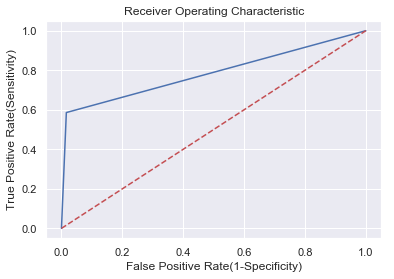

Area under the curve:  0.785


In [84]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--') 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.show()

print("Area under the curve: ",round(auc(false_positive_rate, true_positive_rate),3))

In [100]:
report = metrics.classification_report(y_pred, Y_test)


In [91]:
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1403
           1       0.59      0.77      0.67        97

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.78      0.87      0.82      1500
weighted avg       0.96      0.95      0.95      1500



In [102]:
recall

0.6295081967213115